# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from collections import deque
import time
from typing import List, Tuple

from maddpg import MADDPG
import matplotlib.pyplot as plt
import numpy as np
import torch
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Train the MADDPG

In [5]:
PRINT_EVERY = 100
WINDOW_SIZE = 100 # number of episodes to calculate the latest average score.
MIN_SCORE = 0.5
NUM_AGENT = 2

def train(
    maddpg: MADDPG,
    env: UnityEnvironment,
    n_episodes: int = 3000,
    max_t: int = 1000,
) -> Tuple[List[float], List[float]]:
    """
    Train MADDPG in the environment.
    
    Params
    ======
    maddpg: Multi Agent DDPG
    env: environment 
    n_episodes: number of episodes for training
    max_t: max number of time steps per episode
    """
    scores = []
    avg_scores = []
    scores_window = deque(maxlen=WINDOW_SIZE)
    brain_name = env.brain_names[0]
    
    start_time = time.time()
    for i_episode in range(1, n_episodes + 1):
        states = env.reset(train_mode=True)[brain_name].vector_observations
        score = np.zeros(maddpg.num_agents)
        for t in range(max_t):
            actions = maddpg.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            maddpg.step(states, actions, rewards, next_states, dones)
            score += rewards
            states = next_states
            if any(dones):
                break
                
        curr_episode_score = np.max(score)
        
        scores.append(curr_episode_score)
        scores_window.append(curr_episode_score)
        avg_score = round(np.mean(scores_window), 4)
        avg_scores.append(avg_score)
        print(f"\rEpisode {i_episode}\tAverage Score: {avg_score}", end="")
        if i_episode % PRINT_EVERY == 0:
            print(f"\rEpisode {i_episode}\tAverage Score: {avg_score}\tTime elapsed: {round(time.time() - start_time)} seconds.")
        if avg_score >= MIN_SCORE:
            print(f"\rEnvironment is solved in {i_episode} episodes!\tAverage score: {avg_score}")
            maddpg.save()
            break
            
    return scores, avg_scores

In [6]:
maddpg = MADDPG(state_size, action_size)

scores, avg_scores = train(maddpg, env)

Episode 100	Average Score: 0.0029	Time elapsed: 100 seconds.
Episode 200	Average Score: 0.0039	Time elapsed: 256 seconds.
Episode 300	Average Score: 0.0294	Time elapsed: 479 seconds.
Episode 400	Average Score: 0.0194	Time elapsed: 661 seconds.
Episode 500	Average Score: 0.0314	Time elapsed: 881 seconds.
Episode 600	Average Score: 0.0935	Time elapsed: 1253 seconds.
Episode 700	Average Score: 0.1486	Time elapsed: 1871 seconds.
Episode 800	Average Score: 0.1912	Time elapsed: 2660 seconds.
Episode 900	Average Score: 0.222	Time elapsed: 3562 seconds.
Episode 1000	Average Score: 0.2281	Time elapsed: 4542 seconds.
Episode 1100	Average Score: 0.3337	Time elapsed: 5926 seconds.
Episode 1200	Average Score: 0.3566	Time elapsed: 7389 seconds.
Episode 1300	Average Score: 0.286	Time elapsed: 8596 seconds.
Episode 1400	Average Score: 0.3088	Time elapsed: 9897 seconds.
Episode 1500	Average Score: 0.4183	Time elapsed: 11605 seconds.
Episode 1600	Average Score: 0.3328	Time elapsed: 13051 seconds.
Episod

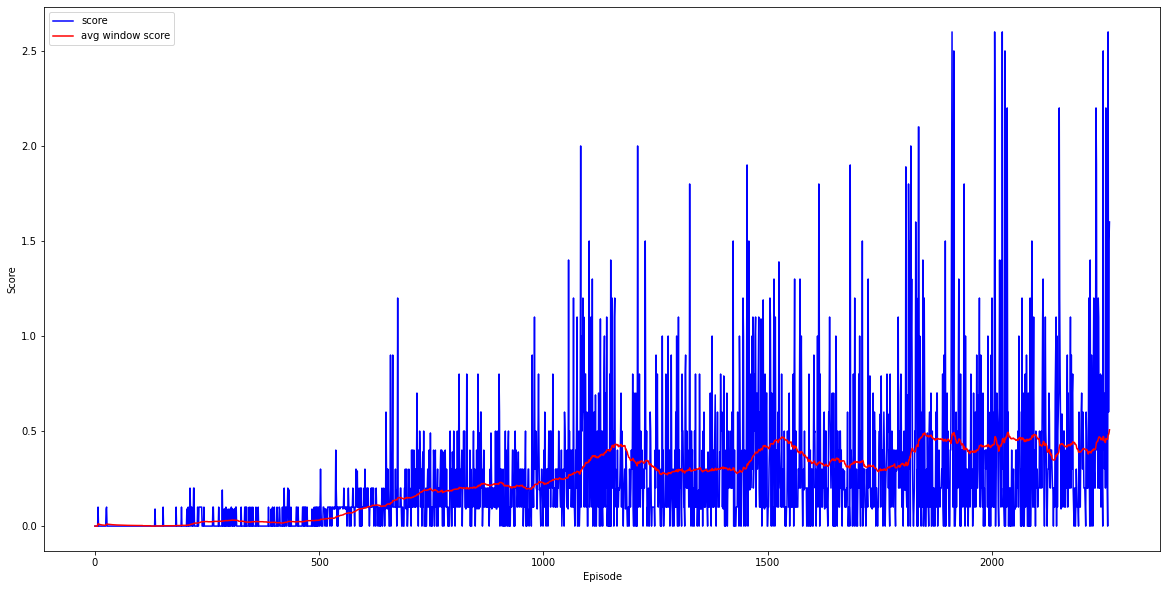

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(scores, c="blue", label="score")
ax.plot(avg_scores, c="red", label="avg window score")
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.legend()

In [11]:
env.close()